<a href="https://colab.research.google.com/github/sametgumus212/Python/blob/master/MC_pastane_sorusu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import random
import statistics


In [2]:
def musterisayisi(p):
  cp=[p[0]]
  #print(cp)
  m=0
  for i in range(1,4):
    cp.append(round(p[i]+cp[i-1],ndigits=2))
 # print(cp)
  s=random.random()
  #print(s)
  if (s<cp[0]):
    m=8
  elif (s<cp[1]):
    m=10
  elif (s<cp[2]):
    m=12
  else:
    m=14
 # print(m)
  return m


In [3]:
def pastasayisi(p):
  cp=[p[0]]
  #print(cp)
  m=0
  for i in range(1,4):
    cp.append(round(p[i]+cp[i-1],ndigits=2))
  #print(cp)
  s=random.random()
  #print(s)
  if (s<cp[0]):
    m=1
  elif (s<cp[1]):
    m=2
  elif (s<cp[2]):
    m=3
  else:
    m=4
  #print(m)
  return m

In [8]:
pp=[0.4,0.3,0.2,0.1]  #pasta olasılığı
pastasayisi(pp)

3

In [9]:
mp=[0.35,0.3,0.25,0.10] #müsteri olasılığı
musterisayisi(mp)

10

In [12]:
anaprogram(mp,pp,365,25)

94349

In [11]:
def anaprogram(mp,pp,n,ua): #ua=üretilecek adet
  toplamkazanc=0
  for i in range(n):
    m=musterisayisi(mp)
    gp=0
    for j in range(m):
      p=pastasayisi(pp)
      gp=gp+p
    if (gp>ua):
      gp=ua
    kp=ua-gp
    kazanc=(54-38)*gp
    zarar=kp*(27-38)
    toplamkazanc+=kazanc+zarar
  #print(toplamkazanc)
  return toplamkazanc


In [18]:

#sadece anaprogram kullanılarak yapılan 5 denemede az durumu (91514 - 97994)  çok durumu ise (78513 -81266) aralıklarında random sayılar üretti.
#ana programda yapılan her bir denemede farklı sonuçlar elde edilince bu aralığı dahada netleştirmek adına monte carlo yöntemi uygulayıp Net kar-zarar durumunun ortaya çıkarılmaya çalışıldı.
#monte carlo uygulanarak yapılan denemelerde ise  az durumunda 94761  ve çk durumunda 79799  gibi bir değere yaklaştığı bu durumda net kar zarar durumun yaklaşık 15000 olacağı görüldü.
def MC_anaprogram(n,az,cok):  # n = durum sayısı    ....az = üretilmek istenen minimum (25) ..... cok =üretilmek istenen maximum durum(30) 
  mc1=[]  # random üretilecek olan az durumlarının sayısını bir diziye yerleştirme
  mc2=[]  # random üretilecek olan cok durumlarının sayısını bir diziye yerleştirme
  Tmc1=0
  Tmc2=0
  for i in range(n):   
    mc1.append(anaprogram(mp,pp,365,az))
    mc2.append(anaprogram(mp,pp,365,cok))
  for i in range(n):
    Tmc1+=mc1[i]
    Tmc2+=mc2[i]
  c1=Tmc1/n
  c2=Tmc2/n
  print("az durumu için=",c1,"    cok durumu icin= ",c2, "   Net :",c1-c2)

In [ ]:
MC_anaprogram(1,25,30)

az durumu için= 93944.0     cok durumu icin=  77892.0    Net : 16052.0


In [ ]:
MC_anaprogram(100,25,30)

az durumu için= 94944.62     cok durumu icin=  79998.54    Net : 14946.080000000002


In [ ]:
MC_anaprogram(1000,25,30)

az durumu için= 94617.299     cok durumu icin=  79596.105    Net : 15021.194000000003


In [19]:
def MC_anaprogram3(n,az,cok):  # n = durum sayısı    ....az = üretilmek istenen minimum (25) ..... cok =üretilmek istenen maximum durum(30) 
  mc1=[]  # random üretilecek olan az durumlarının sayısını bir diziye yerleştirme
  mc2=[]  # random üretilecek olan cok durumlarının sayısını bir diziye yerleştirme
  dmc1=0
  dmc2=0
  Tmc1=0
  Tmc2=0
  sayac=0
  for i in range(n):   
    dmc1=anaprogram(mp,pp,365,az)
    dmc2=anaprogram(mp,pp,365,cok)
    if (dmc1>dmc2):
      sayac+=1
  k=sayac/n
  for i in range(n):
    mc1.append(anaprogram(mp,pp,365,az))
    mc2.append(anaprogram(mp,pp,365,cok)) 
    Tmc1+=mc1[i]
    Tmc2+=mc2[i]
  c1=Tmc1/n
  c2=Tmc2/n
  sd1=statistics.stdev(mc1)
  sd2=statistics.stdev(mc2)
 # print("az varyans=",sd1**2,"    varyans= ",sd2**2, "   Net :",sd1**2-sd2**2)
  #print("k= ",k,  "   sayac=",sayac,"   n=",n)
  print("az durumu için=",c1,"    cok durumu icin= ",c2, "   Net :",c1-c2)

In [20]:
MC_anaprogram3(2,25,25)

az durumu için= 92364.5     cok durumu icin=  92756.0    Net : -391.5


In [25]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

import statistics
def MC_anaprogram2(n,az,cok):  # n = durum sayısı    ....az = üretilmek istenen minimum (25) ..... cok =üretilmek istenen maximum durum(30) 
  mc1=[]  # random üretilecek olan az durumlarının sayısını bir diziye yerleştirme
  mc2=[]  # random üretilecek olan cok durumlarının sayısını bir diziye yerleştirme
  Tmc1=0
  Tmc2=0
  for i in range(n):   
    mc1.append(anaprogram(mp,pp,365,az))
    mc2.append(anaprogram(mp,pp,365,cok))
  for i in range(n):
    Tmc1+=mc1[i]
    Tmc2+=mc2[i]
  m1=Tmc1/n
  m11=statistics.mean(mc1)
  sd1=statistics.variance(mc1)
  sd2=statistics.variance(mc2)
 
  print(m11,m1)
  c1=m1
  m2=Tmc2/n
  c2=m2
  zhesap(mc1)
  #print("az varyans=",sd1,"    varyans= ",sd2, "   Net :",sd1-sd2)
  print("az durumu için=",c1,"    cok durumu icin= ",c2, "   Net :",c1-c2)

  data = norm.rvs(mc1)

  # Fit a normal distribution to the data:
  mu, std = norm.fit(data)

  # Plot the histogram.
  plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

  # Plot the PDF.
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)
  plt.plot(x, p, 'k', linewidth=2)
  title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std/365)
  plt.title(title)

  plt.show()


  data2 = norm.rvs(mc2)

  # Fit a normal distribution to the data:
  mu2, std2 = norm.fit(data2)

  # Plot the histogram.
  plt.hist(data2, bins=25, density=True, alpha=0.6, color='r')

  # Plot the PDF.
  xmin2, xmax2 = plt.xlim()
  x2 = np.linspace(xmin2, xmax2, 100)
  p2 = norm.pdf(x2, mu2, std2)
  plt.plot(x2, p2, 'k', linewidth=2)
  title2 = "Fit results2: mu = %.2f,  std = %.2f" % (mu2, std2/365)
  plt.title(title2)

  plt.show()

In [28]:
def zhesap(a):
  zdata=[]
  m=statistics.mean(a)
  sd=statistics.variance(a)
  for i in a:
    zdata.append((i-m)/sd)
  #print(zdata)



94797.875 94797.875
az durumu için= 94797.875     cok durumu icin=  79611.36    Net : 15186.515


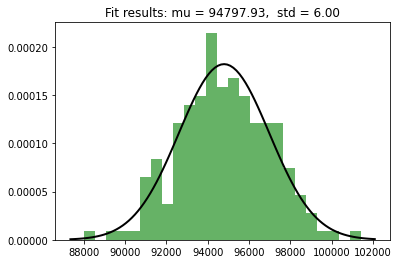

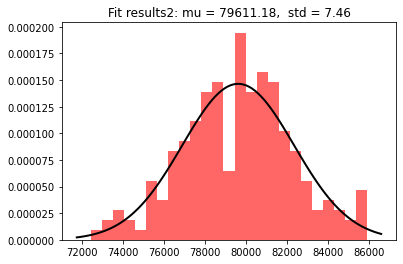

In [29]:
MC_anaprogram2(200,25,30)

94765.394 94765.394
az durumu için= 94765.394     cok durumu icin=  79718.793    Net : 15046.600999999995


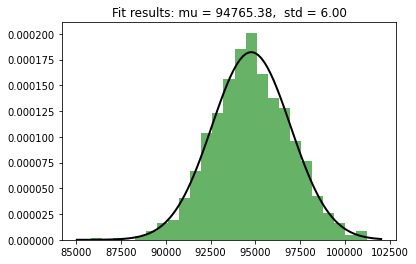

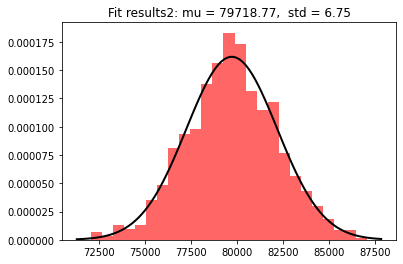

In [30]:
MC_anaprogram2(1000,25,30)

94679.2127 94679.2127
az durumu için= 94679.2127     cok durumu icin=  79696.8771    Net : 14982.335600000006


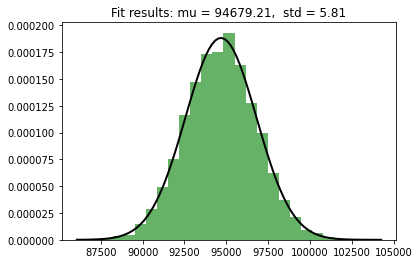

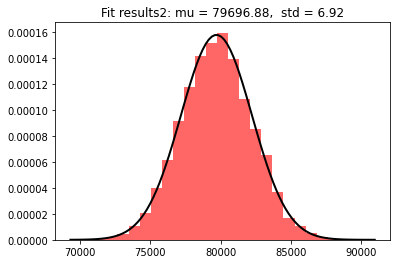

In [31]:
MC_anaprogram2(10000,25,30)

In [ ]:
#sadece anaprogram kullanılarak yapılan 5 denemede az durumu (91514 - 97994)  çok durumu ise (78513 -81266) aralıklarında random sayılar üretti.
#ana programda yapılan her bir denemede farklı sonuçlar elde edilince bu aralığı dahada netleştirmek adına monte carlo yöntemi uygulayıp Net kar-zarar durumunun ortaya çıkarılmaya çalışıldı.
#monte carlo uygulanarak yapılan denemelerde ise  az durumunda 94761  ve çk durumunda 79799  gibi bir değere yaklaştığı bu durumda net kar zarar durumun yaklaşık 15000 olacağı görüldü.
import statistics
import numpy as np
import matplotlib.pyplot as plt
def MC_anaprogram(n,az,cok):  # n = durum sayısı    ....az = üretilmek istenen minimum (25) ..... cok =üretilmek istenen maximum durum(30) 
  mc1=[]  # random üretilecek olan az durumlarının sayısını bir diziye yerleştirme
  mc2=[]  # random üretilecek olan cok durumlarının sayısını bir diziye yerleştirme
  Tmc1=0
  Tmc2=0
  for i in range(n):   
    mc1.append(anaprogram(mp,pp,365,az))
    mc2.append(anaprogram(mp,pp,365,cok))
  for i in range(n):
    Tmc1+=mc1[i]
    Tmc2+=mc2[i]
  s5=statistics.mean(200)
  
  mean=statistics.mean(mc1)
  sd=statistics.stdev(mc1)
  x_min=min(mc1)
  print(x_min)
  x_max=max(mc1)
  x=np.linspace(x_min,x_max,len(mc1))
  print(mean)
  
  #x=np.random.normal(mean,sd,mc1)
  y=scipy.stats.norm.pdf(x,mean,sd)
    
  plt.plot(x,y, color='coral')

  plt.grid()

  plt.xlim(x_min,x_max)
  plt.ylim(0,0.25)

  plt.title('How to plot a normal distribution in python with matplotlib',fontsize=10)

  plt.xlabel('x')
  plt.ylabel('Normal Distribution')

  plt.savefig("normal_distribution.png")
  plt.show()

  #pdf=gauss(x,mean,sd)

  #plt.figure()
  #plt.scatter(x,y)
  #plt.show() 
 # plt.plot(x,mc1,color='red')
  #plt.xlabel('points')
  #plt.ylabel('olasılık')
  print(s5)
  c1=Tmc1/n
  c2=Tmc2/n
  print("az durumu için=",c1,"    cok durumu icin= ",c2, "   Net :",c1-c2)


In [ ]:
import statistics
MC_anaprogram(30,25,30)

In [ ]:
def gauss(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

4.0 1.8708286933869707


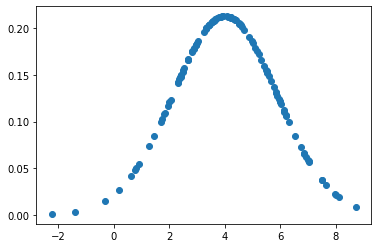

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import scipy.stats

a=[1,4,6,5]
mean1=np.mean(a)
sd1=np.std(a)
print(mean1,sd1)
x_min=min(mc1)
x_max=max(mc1)
x=np.random.normal(x_min,x_max,n)

y=scipy.stats.norm.pdf(x,mean1,sd1)
#size(x)
# Calculating mean and standard deviation
#mean = statistics.mean(a)
#sd = statistics.stdev(a)
  
plt.figure()
plt.scatter(x,y)
plt.show()

In [ ]:

import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
def MC_anaprogram2(n,az,cok):  # n = durum sayısı    ....az = üretilmek istenen minimum (25) ..... cok =üretilmek istenen maximum durum(30) 
  mc1=[]  # random üretilecek olan az durumlarının sayısını bir diziye yerleştirme
  mc2=[]  # random üretilecek olan cok durumlarının sayısını bir diziye yerleştirme
  Tmc1=0
  Tmc2=0
  for i in range(n):   
    mc1.append(anaprogram(mp,pp,365,az))
    mc2.append(anaprogram(mp,pp,365,cok))
  for i in range(n):
    Tmc1+=mc1[i]
    Tmc2+=mc2[i]
  
  
  a=mc1
  x_min = min(a)
  x_max = max(a)

  mean =statistics.mean(a)
  std = statistics.stdev(a)
  x = np.linspace(x_min, x_max,len(a))

  y = scipy.stats.norm.pdf(x,mean,std)
  plt.grid()

  plt.plot(x,y, color='black')
    
  pt1 = mean + std
  plt.plot([pt1 ,pt1 ],[0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

  pt2 = mean - std
  plt.plot([pt2 ,pt2 ],[0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

  ptx = np.linspace(pt1, pt2, len(a))
  pty = scipy.stats.norm.pdf(ptx,mean,std)

  plt.fill_between(ptx, pty, color='#0b559f', alpha='1.0')

  # fill area 2

  pt3 = mean +2.0*std
  plt.plot([pt3 ,pt3 ],[0,scipy.stats.norm.pdf(pt3 ,mean, std)], color='red')

  pt4 = mean - 2.0 * std
  plt.plot([pt4 ,pt4 ],[0,scipy.stats.norm.pdf(pt4 ,mean, std)], color='red')

  ptxx = np.linspace(pt3, pt4, len(a))
  ptyy = scipy.stats.norm.pdf(ptxx,mean,std)

  plt.fill_between(ptxx, ptyy, color='#2b7bba', alpha='1.0')
  


  plt.xlim(x_min,x_max)
  plt.ylim(0,0.25)

  plt.title('How to plot a normal distribution in python with matplotlib',fontsize=10)

  plt.xlabel('x')
  plt.ylabel('Normal Distribution')

  plt.savefig("normal_distribution_2.png")
  plt.show()

TypeError: ignored

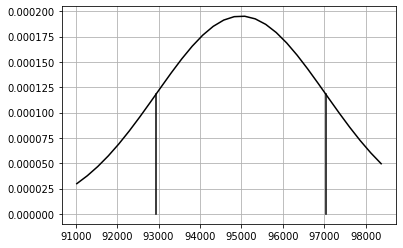

In [ ]:
MC_anaprogram2(30,25,30)